# Машинное обучение, ФКН ВШЭ

# Практическое задание 11. Несбалансированные задачи

## Общая информация
Дата выдачи: 24.04.2025

Мягкий дедлайн: 13.05.2025 23:59 MSK

Жесткий дедлайн: 18.05.2025 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-xx-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

## О задании

В этом задании мы разберем основные техники работы в задачах, где один из классов занимает существенно меньшую долю выборки, чем остальные. Для простоты мы обойдемся бинарной задачей, тем не менее, во многом данные методы можно перенести и на задачи с б**о**льшим числом классов. Кроме того, вы получите очередной бесценный опыт исследования случайной библиотеки случайных индусов с нуля.

In [ ]:
# если проверяете код в кеггле
# после данной ячейки перезапустите среду и закомментируйте код в данной ячейке
# !pip install --upgrade scikit-learn
# !pip install --upgrade imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from tqdm.auto import tqdm

In [ ]:
import warnings
warnings.simplefilter("ignore")

**Задание -1 (1 балл)**. EDA

В качестве данных для нашей работы возьмем выложенный на kaggle датасет транзакций, в котором нужно выискивать мошеннические проводки: [клик](https://www.kaggle.com/mlg-ulb/creditcardfraud). Данная задача по определению подходит под несбалансированную, что можно сказать даже без наличия каких-либо данных (понятно, что среди всех транзакций клиентов очень малая часть будет мошеннической).

Загрузим данные, проведем некоторые классические манипуляции.

In [ ]:
"""%%bash
kaggle datasets download -d mlg-ulb/creditcardfraud
unzip creditcardfraud.zip""";

In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Наши данные были анонимизированы. Мы имеем 30 признаков, из которых 28 - это результаты PCA-преобразования на исходном датасете. Еще 2 признака представляют собой время в секундах, прошедшее с момента первой транзакции в датасете, и размер транзакции. Скажите, какова доля положительных объектов в выборке?

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
# доля положительных объектов
df['Class'].value_counts()[1]/df.shape[0]

np.float64(0.001727485630620034)

Начнем с обработки времени. Секунды сами по себе не несут большой информации о зависимостях в данных, попробуйте по ним создать признаки "час" (от 0 до 23) и "день" (от 0 до ...) в аналогичной манере (принимая первый объект выборки за начальную точку). Сколько дней покрывают данные?

In [ ]:
df['Hour'] = (df['Time'] // 3600) % 24
df['Day'] = df['Time'] // 86400
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.0,1.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.0,1.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.0,1.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.0,1.0


Наши данные покрывают всего два дня.

Постройте следующие графики:

1. Распределение числа транзакций по каждому часу (line-plot).
2. Распределение доли мошеннических транзакций по каждому часу (line-plot)
3. То же самое для дней (здесь можно использовать bar-plot, так как дней должно быть немного).

Какие выводы можно сделать из графиков? На ваш взгляд, как можно связать полученные нами часы с реальными часами в сутках?

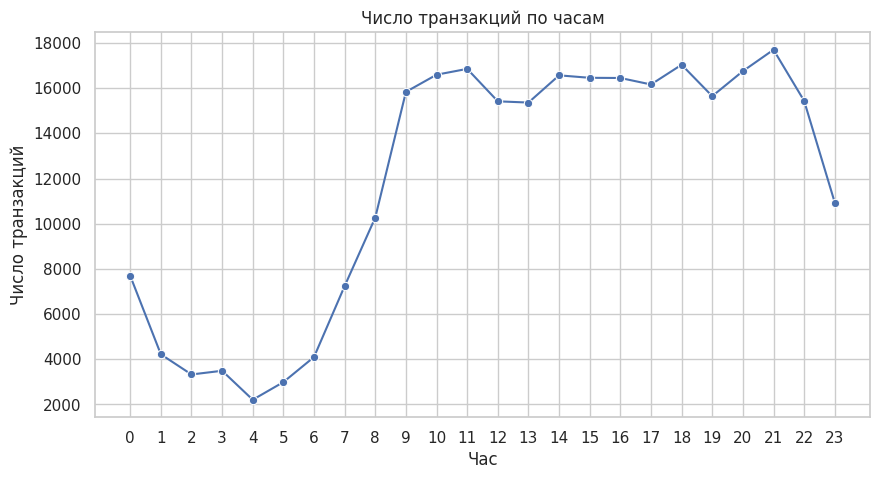

In [ ]:
hourly_counts = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Число транзакций по часам')
plt.xlabel('Час')
plt.ylabel('Число транзакций')
plt.xticks(range(24))
plt.show()

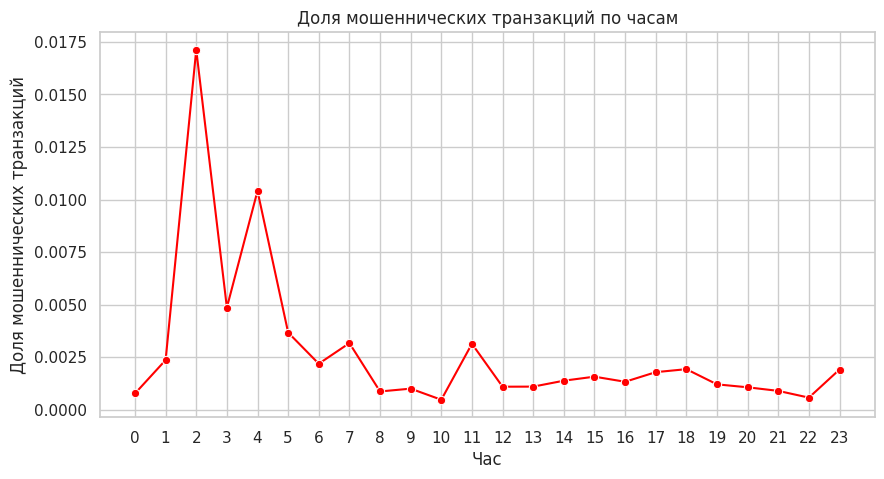

In [ ]:
hourly_fraud_ratio = df.groupby('Hour')['Class'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_fraud_ratio.index, y=hourly_fraud_ratio.values, marker='o', color='red')
plt.title('Доля мошеннических транзакций по часам')
plt.xlabel('Час')
plt.ylabel('Доля мошеннических транзакций')
plt.xticks(range(24))
plt.show()

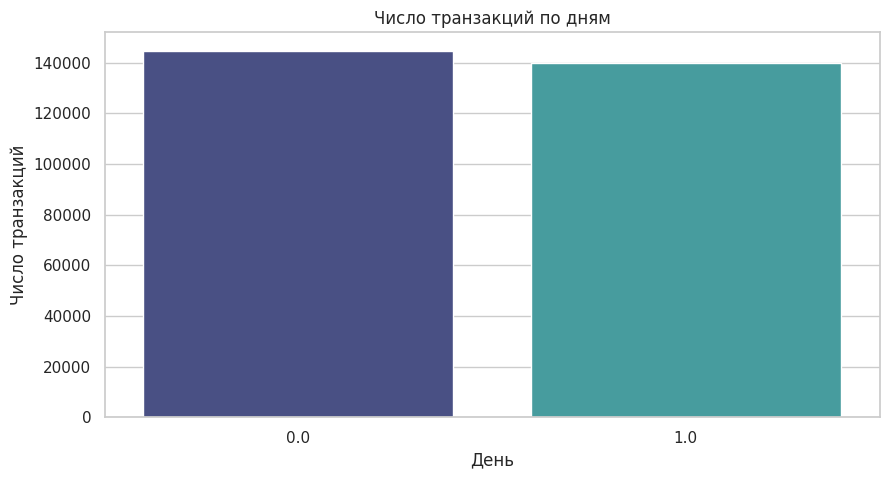

In [ ]:
hourly_counts = df['Day'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='mako')
plt.title('Число транзакций по дням')
plt.xlabel('День')
plt.ylabel('Число транзакций')
plt.xticks(range(2))
plt.show()

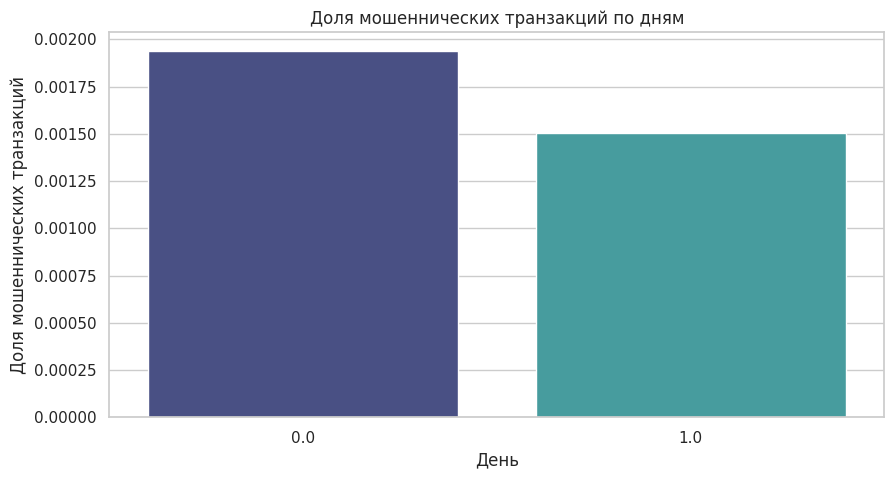

In [ ]:
hourly_fraud_ratio = df.groupby('Day')['Class'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_fraud_ratio.index, y=hourly_fraud_ratio.values, palette='mako')
plt.title('Доля мошеннических транзакций по дням')
plt.xlabel('День')
plt.ylabel('Доля мошеннических транзакций')
plt.xticks(range(2))
plt.show()

Наверное можно интерпретировать полученные нами часы, как более менее реальные, потому что наименьшее количество транзакций приходится на время, в которое обычные люди спят (00:00-07:00). При этом примерно в это же время наблюдаются высокие значения доли мошеннических транзакций. Если же посмотреть на графики, где рассматриваются дни, то разница между полученными значениями не очень большая.

С анонимизированными признаками вряд ли можно придумать что-то интересное. Попробуйте (например, с помощью корреляции?) выбрать несколько наиболее важных признаков и поглядеть на различия в их распределении для разных классов.

In [ ]:
features = [col for col in df.columns]

correlations = df[features].corr()['Class'].drop('Class').abs()
correlations = correlations.sort_values(ascending=False)
correlations

,Class
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539
V3,0.192961
V7,0.187257
V11,0.154876
V4,0.133447
V18,0.111485


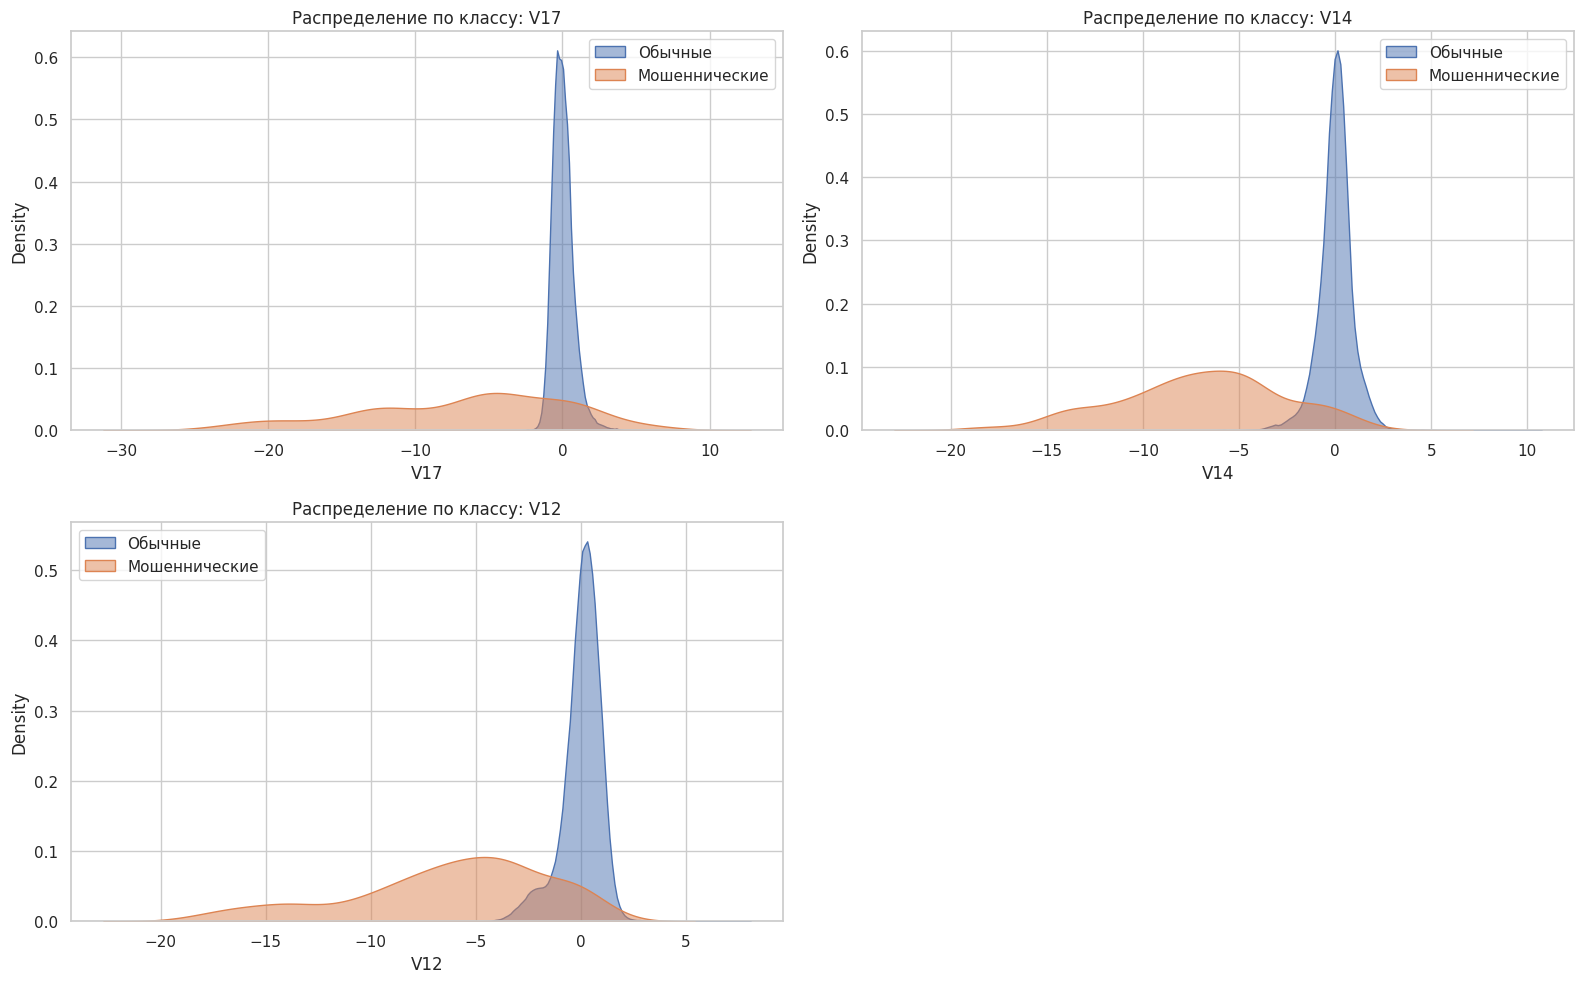

In [ ]:
features = correlations.head(3).index.tolist()

plt.figure(figsize=(16, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data=df[df['Class'] == 0], x=feature, label='Обычные', fill=True, common_norm=False, alpha=0.5)
    sns.kdeplot(data=df[df['Class'] == 1], x=feature, label='Мошеннические', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Распределение по классу: {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

Из графиков очевидно, что у трёх самых коррелирующих с целевой переменной признаков распределения их по классам сильно различаются. Если у обычных операций признак сосредоточен в области, близкой к 0, то у мошеннических операций размах значений достикает 25-30.

Теперь давайте разделим данные. Отделите хронологически последние 20% транзакций и поделите их пополам (также хронологически, т.е. без перемешивания) на валидационные и тестовые. Это разбиение не совсем корректно (как можно было заметить, мошеннические транзакции имеют разное распределение во времени - по-хорошему, нам стоило бы выделить целые сутки записей как под валидацию, так и под тест), тем не менее, мы не сможем получить больше данных для адекватного контроля, поэтому обойдемся этим.

In [ ]:
len_df = df.shape[0]
split_80 = int(len_df * 0.8)

train_df = df.iloc[:split_80]
test_val_df = df.iloc[split_80:]

split_80_50 = int(test_val_df.shape[0] * 0.5)

val_df = test_val_df.iloc[:split_80_50]
test_df = test_val_df.iloc[split_80_50:]

# Часть 1. Несбалансированная классификация.

**Задание 0. (1 балл)**: перед началом работы давайте поговорим о том, как мы будем оценивать качество. Классические метрики для качества классификации чаще всего "ломаются" на задачах с сильным перекосом. Чему будет равно значение accuracy для наивного предсказания (= мажорный класс для каждого объекта)? (можете не отвечать, просто подумайте)

Из курса МО-1 вам уже известно, что мы можем использовать в таких задачах `AUC-PR` и получать адекватные показатели. Можно сказать, что `AUC-PR` представляет собой матожидание `precision` по распределению, заданному выигрышем в `recall` при смене порога.

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

def auc_pr(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)

    score = auc(recall, precision)

    return score

Тем не менее, существуют и другие, не менее интересные метрики. Одной из таких метрик является коэффициент Каппа Коэна, представляющий собой нормализованную `accuracy`:

$$\kappa = \frac{p_o - p_e}{1 - p_e}$$

Данная метрика служит в качестве меры согласованности между двумя независимыми предсказателями, но ничего не знает про "верные" и "предсказанные" метки (в отличие от многих других метрик машинного обучения). Здесь $p_o$ - доля согласованных предсказаний, а $p_e$ - доля согласованных предсказаний, которая могла бы получиться при случайных ответах предсказателей. В нашем случае это работает так:

• В качестве $p_o$ берем accuracy

• В качестве $p_e$ примем следующую величину - вероятность случайного соглашения позитивных ответов (произведение долей позитивных ответов в обоих предсказаниях) плюс вероятность случайного соглашения негативных ответов (произведение долей негативных ответов в обоих предсказаниях)

Метрика принимает значения от -1 до 1, где 1 - полная согласованность, 0 - согласованность на уровне рандома, -1 - совсем плохо. Как уже говорилось, метрика не различает "верные" и "предсказанные" метки, поэтому является симметричной (можете использовать это для отладки):

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import cohen_kappa_score

def coef_kappa_koena(y_true, y_pred, threshold = 0.5):
    if np.array(y_pred).dtype.kind not in 'bi':
        y_pred = (np.array(y_pred) >= threshold).astype(int)

    p_o = accuracy_score(y_true, y_pred)

    matrix = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = matrix.ravel()

    p_e = (((TP+FP) / len(y_true)) * ((TP+FN) / len(y_true)) + ((TN+FP) / len(y_true)) * ((TN+FN) / len(y_true)))

    kappa = (p_o - p_e) / (1 - p_e)
    return kappa

Еще одной метрикой в такой задаче служит коэффициент корреляции Мэтьюза, выражающийся в терминах матрицы ошибок следующим образом:

$$\text{MCC} = \frac{TP\times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$

Метрика принимает значения от -1 до 1, интерпретируемые аналогичным образом.

In [ ]:
from sklearn.metrics import matthews_corrcoef

def matthews_corrcoef_implementation(y_true, y_pred, threshold = 0.5):

    if np.array(y_pred).dtype.kind not in 'bi':
        y_pred = (np.array(y_pred) >= threshold).astype(int)

    matrix = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = matrix.ravel()

    numerator = TP * TN - FP * FN
    denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

    if denominator == 0 and numerator == 0:
        return 0.0

    return numerator / denominator

Обратите внимание, что эти метрики вычисляются на бинаризованных предсказаниях, поэтому может иметь смысл дополнительная настройка порога бинаризации.

Давайте проверим, что наши метрики действительно подходят под задачу. Вычислите их значения для наивного предсказания (aka мажорный класс для всех объектов):

In [ ]:
y_true = df['Class']
y_pred = [0] * len(df)

print(f'AUC-PR: {auc_pr(y_true, y_pred)}')
print(f'Cohen_Kappa_score:{cohen_kappa_score(y_true, y_pred)}')
print(f'Coefficient Kappa-Cohen implementation: {coef_kappa_koena(y_true, y_pred)}')
print(f'MCC: {matthews_corrcoef(y_true, y_pred)}')
print(f'MCC implementation: {matthews_corrcoef_implementation(y_true, y_pred)}')

AUC-PR: 0.50086374281531
Cohen_Kappa_score:0.0
Coefficient Kappa-Cohen implementation: 0.0
MCC: 0.0
MCC implementation: 0.0


Давайте запустим бейзлайн-решение для нашей задачи. С чего же начнем? Возьмите `catboost` и обучите его классификатор на наших данных (используйте все признаки). Вычислите значения всех метрик на тестовой части, для контроля переобучения используйте валидационную (здесь и далее везде, где фигурирует `catboost`).

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
y_train = train_df['Class']
X_train = train_df.drop('Class', axis=1)

y_val = val_df['Class']
X_val = val_df.drop('Class', axis=1)

y_test = test_df['Class']
X_test = test_df.drop('Class', axis=1)

In [ ]:
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0
)

model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    use_best_model=True
)

y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
print(f'AUC-PR on validation: {auc_pr(y_val, y_val_proba)}')
print(f'Coefficient Kappa-Cohen implementation on validation: {coef_kappa_koena(y_val, y_val_proba)}')
print(f'MCC implementation on validation: {matthews_corrcoef_implementation(y_val, y_val_proba)}')

print(f'AUC-PR on test: {auc_pr(y_test, y_test_proba)}')
print(f'Coefficient Kappa-Cohen implementation on test: {coef_kappa_koena(y_test, y_test_proba)}')
print(f'MCC implementation on test: {matthews_corrcoef_implementation(y_test, y_test_proba)}')

AUC-PR on validation: 0.8605305170679955
Coefficient Kappa-Cohen implementation on validation: 0.8384510754991502
MCC implementation on validation: 0.8467917871368241
AUC-PR on test: 0.7057239238964528
Coefficient Kappa-Cohen implementation on test: 0.717758652842163
MCC implementation on test: 0.7237392722838328


Если вы все сделали правильно, у вас должны были получиться значения в районе 0.7.

**Задание 1. (1 балл)**. Многие реализации методов предлагают встроенные способы для борьбы с нашей проблемой. Самое часто встречающееся решение - просто добавить вес в функции потерь для минорного класса (таким образом, ошибка на объекте минорного класса будет весить больше, чем для мажорного). В `catboost` это также реализовано, причем для бинарной задачи это можно сделать целыми двумя способами (можете выбрать любой, на свой вкус, автор задания предпочитает отдельный скейлинг для минорного класса). Чаще всего в качестве веса берется отношение числа объектов мажорного класса к числу минорного. Попробуйте обучить модель с таким скалированием и сравните метрики на тестовой части с бейзлайном.

In [ ]:
class_weight = {0: 1.0, 1: df['Class'].value_counts()[0]/df['Class'].value_counts()[1]}

model_weights = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    class_weights=class_weight
)

model_weights.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    use_best_model=True
)


y_test_pred_weights = model_weights.predict(X_test)
y_test_proba_weights = model_weights.predict_proba(X_test)[:, 1]

In [ ]:
print(f'AUC-PR on test: {auc_pr(y_test, y_test_proba_weights)}')
print(f'Coefficient Kappa-Cohen implementation on test: {coef_kappa_koena(y_test, y_test_proba_weights)}')
print(f'MCC implementation on test: {matthews_corrcoef_implementation(y_test, y_test_proba_weights)}')

AUC-PR on test: 0.697169043454308
Coefficient Kappa-Cohen implementation on test: 0.15417264750410534
MCC implementation on test: 0.25014960662847957


Полученные метрики сильно хуже, чем у обычного catboost. Исключением является только AUC-PR, 0.707 у бейзлайна против 0.698 у модели с весами.

Поскольку данный вес будет являться гиперпараметром метода, было бы опрометчиво остановиться на одном значении (тем более, с большой вероятностью у вас все сломалось). Запустите перебор для этого гиперпараметра на валидационной выборке (используйте `PR-AUC`), подберите оптимальный порог бинаризации для $\kappa$ или $\text{MCC}$. Для лучшего найденного веса и порога вычислите все метрики на тестовой части.

При этом можете также проверить отдельное скалирование в большую сторону для мажорного класса (т.е. веса минорного сделать меньше 1) и экстремальные скалирования (т.е. веса минорного больше, чем в начале этого задания). Какой вес получился оптимальным?

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.7 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def objective(trial):
    params = {
        "iterations": 500,
        "learning_rate": 0.05,
        "depth": 6,
        "class_weights": {0: trial.suggest_float("class_weights_0", 0.1, 0.99), 1: trial.suggest_float("class_weights_1", 1, 600)},
        "verbose": 0,
        "task_type": "CPU"
    }

    model = CatBoostClassifier(**params)
    model.fit(
        X_train, y_train,
        eval_set=(X_val, y_val),
        use_best_model=True
    )

    treshold =  trial.suggest_float("treshold", 0, 1)

    preds = model.predict(X_val)
    acc = matthews_corrcoef_implementation(y_val, preds, treshold)
    return acc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40)

print("Лучшие параметры:")
print(study.best_trial.params)
print("matthews_corrcoef_implementation", study.best_value)

[I 2025-05-10 12:40:46,812] A new study created in memory with name: no-name-6278c97e-b29c-4141-9b5a-34a01a3cc3ae
[I 2025-05-10 12:41:44,899] Trial 0 finished with value: 0.5349192693597298 and parameters: {'class_weights_0': 0.9539267308581235, 'class_weights_1': 337.56530808948713, 'treshold': 0.5734288214662573}. Best is trial 0 with value: 0.5349192693597298.
[I 2025-05-10 12:42:26,817] Trial 1 finished with value: 0.5290095994611161 and parameters: {'class_weights_0': 0.8840449035894169, 'class_weights_1': 308.58720943414943, 'treshold': 0.7551293398795966}. Best is trial 0 with value: 0.5349192693597298.
[I 2025-05-10 12:43:08,998] Trial 2 finished with value: 0.3376154975176871 and parameters: {'class_weights_0': 0.4235865882882086, 'class_weights_1': 414.688403818465, 'treshold': 0.19309419291680863}. Best is trial 0 with value: 0.5349192693597298.
[I 2025-05-10 12:43:51,279] Trial 3 finished with value: 0.3805189186495235 and parameters: {'class_weights_0': 0.6489378606072342,

Лучшие параметры:
{'class_weights_0': 0.8000188345466418, 'class_weights_1': 6.505707584832884, 'treshold': 0.4288045066535938}
matthews_corrcoef_implementation 0.8795924191737506


In [ ]:
model_weights_new = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    class_weights={0: study.best_trial.params['class_weights_0'], 1: study.best_trial.params['class_weights_1']}
)

model_weights_new.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    use_best_model=True
)

y_test_pred_weights = model_weights_new.predict(X_test)
y_test_proba_weights = model_weights_new.predict_proba(X_test)[:, 1]

threshold = study.best_trial.params['treshold']

In [ ]:
print(f'AUC-PR on test: {auc_pr(y_test, y_test_proba_weights)}')
print(f'Coefficient Kappa-Cohen implementation on test: {coef_kappa_koena(y_test, y_test_proba_weights, threshold)}')
print(f'MCC implementation on test: {matthews_corrcoef_implementation(y_test, y_test_proba_weights, threshold)}')

AUC-PR on test: 0.6858913465632144
Coefficient Kappa-Cohen implementation on test: 0.6954066627452857
MCC implementation on test: 0.6960659441542087


Не уверен, что optuna справится с подбором гиперпараметров. По идее, если изменение весов никак не улучшит ситуацию, то она вернуться к изначальным значениям, но тут она этого не сделала, и были получены веса: {'class_weights_0': 0.8000188345466418, 'class_weights_1': 6.505707584832884, 'treshold': 0.4288045066535938}

**Задание 2. (1 балл)**. На самом деле, то, что мы сейчас делали, очень схоже с другой распространенной техникой - оверсэмплингом. Фактически, мы можем продублировать все объекты минорного класса и получить тот же эффект, какой был бы при использовании веса, равного 2. Тем не менее, такой подход - это лишь малая часть того, что мы можем проделать с целью повысить число объектов минорного класса.

Для продолжения работы установим библиотеку [imbalanced-learn](https://imbalanced-learn.org/stable/):

In [ ]:
# !pip install imbalanced-learn
# conda install -c conda-forge imbalanced-learn

In [ ]:
# !pip install --upgrade scikit-learn
# !pip install --upgrade imbalanced-learn

Первый метод, которым мы воспользуемся, называется SMOTE (его вы уже разбирали на лекции). Кратко напомним суть: мы выбираем случайного кандидата среди $k$ ближайших соседей объекта минорного класса, затем берем точку на отрезке между двумя объектами (т.е. выпуклую комбинацию со случайными коэффициентами) и добавляем в выборку.

In [ ]:
from imblearn.over_sampling import SMOTE

Используйте SMOTE для ресэмплинга обучающей выборки, на новой выборке обучите модель (вес положительных объектов скалировать не нужно). Замерьте качество на тестовой выборке (**важно!** не преобразовывайте валидационную и тестовую выборку никак - мы не хотим отслеживать качество на объектах, которых в реальности не существует). Сравните полное выравнивание выборки с частичным (т.е. таким, что баланс классов улучшается, но не достигает равенства - скажем, 1:2 и 1:10).

In [ ]:
n_pos = df['Class'].value_counts()[1]
n_neg = df['Class'].value_counts()[0]

In [ ]:
n_majority_target = n_neg

smote = SMOTE(sampling_strategy = n_majority_target / n_neg, random_state = 52)
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

model_oversample = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0
)
model_oversample.fit(X_train_sampled, y_train_sampled, eval_set=(X_val, y_val), use_best_model=True)

y_test_pred_sampled = model_oversample.predict(X_test)
y_test_proba_sampled = model_oversample.predict_proba(X_test)[:, 1]

print(f'AUC-PR on test for samling 1:1: {auc_pr(y_test, y_test_proba_sampled )}')
print(f'Coefficient Kappa-Cohen implementation on test for samling 1:1: {coef_kappa_koena(y_test, y_test_proba_sampled)}')
print(f'MCC implementation on test for samling 1:1: {matthews_corrcoef_implementation(y_test, y_test_proba_sampled)}')

AUC-PR on test for samling 1:1: 0.7266584670572677
Coefficient Kappa-Cohen implementation on test for samling 1:1: 0.6396882805812039
MCC implementation on test for samling 1:1: 0.6443525381406625


In [ ]:
n_majority_target = n_neg//2

smote = SMOTE(sampling_strategy = n_majority_target / n_neg, random_state = 52)
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

model_oversample = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0
)
model_oversample.fit(X_train_sampled, y_train_sampled, eval_set=(X_val, y_val), use_best_model=True)

y_test_pred_sampled = model_oversample.predict(X_test)
y_test_proba_sampled = model_oversample.predict_proba(X_test)[:, 1]

print(f'AUC-PR on test for samling 1:2: {auc_pr(y_test, y_test_proba_sampled )}')
print(f'Coefficient Kappa-Cohen implementation on test for samling 1:2: {coef_kappa_koena(y_test, y_test_proba_sampled)}')
print(f'MCC implementation on test for samling 1:2: {matthews_corrcoef_implementation(y_test, y_test_proba_sampled)}')

AUC-PR on test for samling 1:2: 0.7296526002823249
Coefficient Kappa-Cohen implementation on test for samling 1:2: 0.6805885875737391
MCC implementation on test for samling 1:2: 0.6819815751994611


In [ ]:
n_majority_target = n_neg//10

smote = SMOTE(sampling_strategy = n_majority_target / n_neg, random_state = 52)
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

model_oversample = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0
)
model_oversample.fit(X_train_sampled, y_train_sampled, eval_set=(X_val, y_val), use_best_model=True)

y_test_pred_sampled = model_oversample.predict(X_test)
y_test_proba_sampled = model_oversample.predict_proba(X_test)[:, 1]

print(f'AUC-PR on test for samling 1:10: {auc_pr(y_test, y_test_proba_sampled )}')
print(f'Coefficient Kappa-Cohen implementation on test for samling 1:10: {coef_kappa_koena(y_test, y_test_proba_sampled)}')
print(f'MCC implementation on test for samling 1:10: {matthews_corrcoef_implementation(y_test, y_test_proba_sampled)}')

AUC-PR on test for samling 1:10: 0.7388501727860147
Coefficient Kappa-Cohen implementation on test for samling 1:10: 0.7803305381421584
MCC implementation on test for samling 1:10: 0.7824309099074692


Самая лучшая модель получилась с пропорциями 1:10, а самая худшая - 1:1.

**Бонус (1.5 балла)**. Для vanilla SMOTE существуют некоторые модификации, часть из которых была реализована в библиотеке imblearn. Во время лекций/семинаров эти модификации не рассматривались, тем не менее, мы все равно их исследуем.

Найдите статьи о следующих методах и попробуйте вкратце сформулировать, в чем их основная идея (сделайте так, чтобы человек, знакомый с машинным обучением в целом, но не слышавший конкретно про это смог понять):

BorderlineSMOTE - генерирует данные только вокруг пограничных точек минорного класса. Суть в том, что именно такие объекты чаще всего неверно классифицирует модель, поэтому их можно сделать в большем количестве, и тогда модель научится их классифицировать.

SVM-SMOTE - метод определяет границы между классами при помощи SVM. Когда SVM обучен, то модель создаёт новые объекты около опорных векторов минорного класса.

K-Means-SMOTE - все объекты кластеризуются при помощи K-means. После этого кластеры фильтруются таким образом, что остаются только те из них, у которых высокая доля содержания объектов минорного класса. После этого в данных кластерах генерируются новые объекты минорного класса.

ADASYN - генерирует новые объекты минорного класса, основываясь на некоторых расчитываемых алгоритмом плотностях. Алгоритм метода таков: сначала модель ищет K ближайших соседей для каждого объекта из минорного класса. Потом производится подсчёт объектов мажорного класса среди этих соседей. После этого количество соседей мажорного класса для каждого объекта минорного класса нормализуется, и мы получаем своего рода плотность. И уже основываясь на данной плотности генерируются новые объекты минорного класса.

Теперь попробуйте сравнить качество всех методов на наших данных.

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE, SVMSMOTE, KMeansSMOTE, ADASYN

In [ ]:
n_majority_target = n_neg//10

Borderline_smote = BorderlineSMOTE(sampling_strategy = n_majority_target / n_neg, k_neighbors=5, random_state = 52)
X_train_sampled, y_train_sampled = Borderline_smote.fit_resample(X_train, y_train)

model_oversample = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0
)
model_oversample.fit(X_train_sampled, y_train_sampled, eval_set=(X_val, y_val), use_best_model=True)

y_test_pred_sampled = model_oversample.predict(X_test)
y_test_proba_sampled = model_oversample.predict_proba(X_test)[:, 1]

print(f'AUC-PR on test for samling with BorderlineSMOTE: {auc_pr(y_test, y_test_proba_sampled )}')
print(f'Coefficient Kappa-Cohen implementation on test for samling with BorderlineSMOTE:  {coef_kappa_koena(y_test, y_test_proba_sampled)}')
print(f'MCC implementation on test for samling with BorderlineSMOTE: {matthews_corrcoef_implementation(y_test, y_test_proba_sampled)}')

AUC-PR on test for samling with BorderlineSMOTE: 0.6750773648278457
Coefficient Kappa-Cohen implementation on test for samling with BorderlineSMOTE:  0.7140753704859292
MCC implementation on test for samling with BorderlineSMOTE: 0.71488755582656


In [ ]:
n_majority_target = n_neg//10

SVM_smote = SVMSMOTE(sampling_strategy = n_majority_target / n_neg, k_neighbors=5, random_state = 52)
X_train_sampled, y_train_sampled = SVM_smote.fit_resample(X_train, y_train)

model_oversample = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0
)
model_oversample.fit(X_train_sampled, y_train_sampled, eval_set=(X_val, y_val), use_best_model=True)

y_test_pred_sampled = model_oversample.predict(X_test)
y_test_proba_sampled = model_oversample.predict_proba(X_test)[:, 1]

print(f'AUC-PR on test for samling with SVMSMOTE: {auc_pr(y_test, y_test_proba_sampled )}')
print(f'Coefficient Kappa-Cohen implementation on test for samling with SVMSMOTE:  {coef_kappa_koena(y_test, y_test_proba_sampled)}')
print(f'MCC implementation on test for samling with SVMSMOTE: {matthews_corrcoef_implementation(y_test, y_test_proba_sampled)}')

AUC-PR on test for samling with SVMSMOTE: 0.6729782561658852
Coefficient Kappa-Cohen implementation on test for samling with SVMSMOTE:  0.7690752614163152
MCC implementation on test for samling with SVMSMOTE: 0.7754834690252622


In [ ]:
n_majority_target = n_neg//2

KMeans_smote = KMeansSMOTE(sampling_strategy = n_majority_target / n_neg, k_neighbors=2, kmeans_estimator=10000, random_state = 52)
X_train_sampled, y_train_sampled = KMeans_smote.fit_resample(X_train, y_train)

model_oversample = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0
)
model_oversample.fit(X_train_sampled, y_train_sampled, eval_set=(X_val, y_val), use_best_model=True)

y_test_pred_sampled = model_oversample.predict(X_test)
y_test_proba_sampled = model_oversample.predict_proba(X_test)[:, 1]

print(f'AUC-PR on test for samling with KMeansSMOTE: {auc_pr(y_test, y_test_proba_sampled )}')
print(f'Coefficient Kappa-Cohen implementation on test for samling with KMeansSMOTE:  {coef_kappa_koena(y_test, y_test_proba_sampled)}')
print(f'MCC implementation on test for samling with KMeansSMOTE: {matthews_corrcoef_implementation(y_test, y_test_proba_sampled)}')

AUC-PR on test for samling with KMeansSMOTE: 0.6687156146836605
Coefficient Kappa-Cohen implementation on test for samling with KMeansSMOTE:  0.7498260790128308
MCC implementation on test for samling with KMeansSMOTE: 0.7536088618289372


In [ ]:
n_majority_target = n_neg//10

adasyn = ADASYN(sampling_strategy = n_majority_target / n_neg, n_neighbors=5, random_state = 52)
X_train_sampled, y_train_sampled = adasyn.fit_resample(X_train, y_train)

model_oversample = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0
)
model_oversample.fit(X_train_sampled, y_train_sampled, eval_set=(X_val, y_val), use_best_model=True)

y_test_pred_sampled = model_oversample.predict(X_test)
y_test_proba_sampled = model_oversample.predict_proba(X_test)[:, 1]

print(f'AUC-PR on test for samling with ADASYN: {auc_pr(y_test, y_test_proba_sampled )}')
print(f'Coefficient Kappa-Cohen implementation on test for samling with ADASYN:  {coef_kappa_koena(y_test, y_test_proba_sampled)}')
print(f'MCC implementation on test for samling with ADASYN: {matthews_corrcoef_implementation(y_test, y_test_proba_sampled)}')

AUC-PR on test for samling with ADASYN: 0.7376445878833404
Coefficient Kappa-Cohen implementation on test for samling with ADASYN:  0.761729475404941
MCC implementation on test for samling with ADASYN: 0.7625958622585118


Сложно сравнивать полученные результаты с обычным SMOTE, так как для него мы подбирали стратегию семплинга. Если же сравнивать методы только из этого задания, то ADASYN показал себя лучше всего в AUC-PR, а SVMSMOTE вернул самые высокие показатели MCC и коэффициента Каппа-Кохена. Наверное, для решения реальных задач я бы предпочёл использование ADASYN, так как он использует более сложную и обоснованную с точки зрения тервера идею.

**Задание 3. (1 балл)**. До этого момента все наши решения концентрировались на работе с минорным классом. Теперь давайте попробуем зайти с другой стороны. Может быть, для восстановления закономерностей нам не нужно столько объектов мажорного класса, и они просто засоряют нам выборку лишней информацией?

Для решения этой проблемы существуют методы андерсэмплинга. Самое простое, что можно придумать - удалять точки мажорного класса, пока мы не получим приемлемый баланс. Протестируйте следующий метод и постройте графики достигаемых значений метрик от баланса классов и от отношения размеров исходной и пересэмпленной выборки:

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
ratios = [1, 2, 5, 10, 25, 50, 100, 200]

results = []

for ratio in ratios:
    sampler = RandomUnderSampler(sampling_strategy=lambda y: {0: sum(y == 1) * ratio, 1: sum(y == 1)})

    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    model_undersample = CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        verbose=0
    )

    model_undersample.fit(X_resampled, y_resampled, eval_set=(X_val, y_val), early_stopping_rounds=50)

    y_test_proba_sampled = model_undersample.predict_proba(X_test)[:, 1]

    results.append({
        "ratio": ratio,
        "data_frac": len(X_resampled) / len(X_train),
        "AUC-PR": auc_pr(y_test, y_test_proba_sampled),
        "Coefficient Kappa-Cohen": coef_kappa_koena(y_test, y_test_proba_sampled),
        "MCC": matthews_corrcoef_implementation(y_test, y_test_proba_sampled)
    })

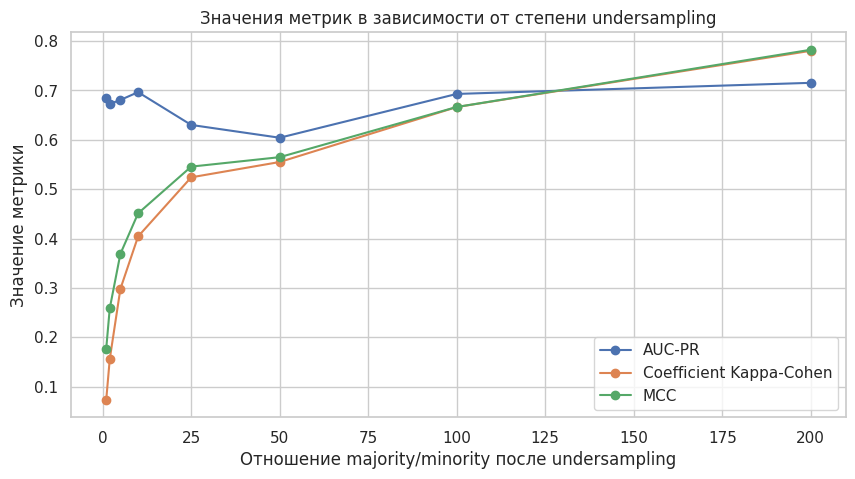

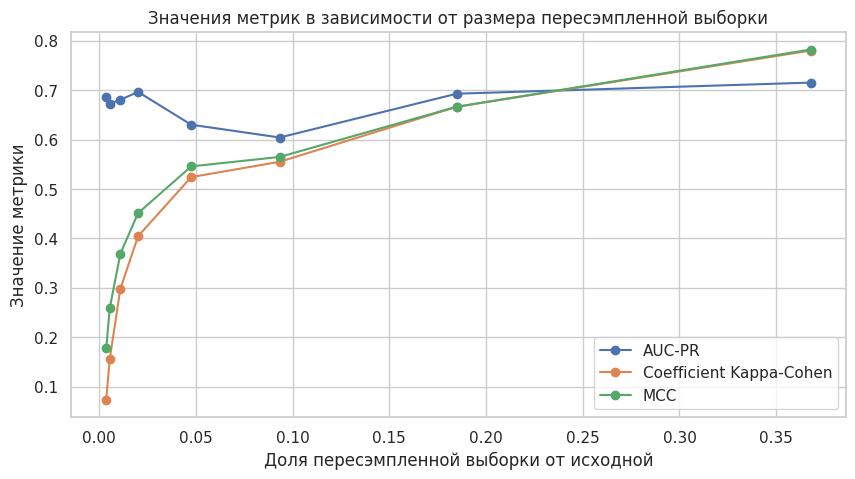

In [ ]:
results = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
for col in ["AUC-PR", "Coefficient Kappa-Cohen", "MCC"]:
    plt.plot(results["ratio"], results[col], marker='o', label=col)
plt.xlabel("Отношение majority/minority после undersampling")
plt.ylabel("Значение метрики")
plt.title("Значения метрик в зависимости от степени undersampling")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
for col in ["AUC-PR", "Coefficient Kappa-Cohen", "MCC"]:
    plt.plot(results["data_frac"], results[col], marker='o', label=col)
plt.xlabel("Доля пересэмпленной выборки от исходной")
plt.ylabel("Значение метрики")
plt.title("Значения метрик в зависимости от размера пересэмпленной выборки")
plt.grid(True)
plt.legend()
plt.show()

Даже такой наивный подход может дать относительно неплохие результаты и улучшить наши метрики. Тем не менее, сейчас мы никак не используем информацию о распределении объектов в выборке. Оказывается, что даже относительно простые эвристические правила могут заметно поднять нам качество - например, мы можем при отбрасывании использовать близость отдельных объектов мажорного класса к минорному и отбрасывать самые близкие. Протестируйте алгоритм [Near-Miss](https://www.site.uottawa.ca/~nat/Workshop2003/jzhang.pdf) на наших данных и постройте графики, аналогичные предыдущему пункту (также добавьте график с зависимостью качества от числа соседей).

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
ratios = [1, 2, 5, 10, 25, 50, 100, 200]
results = []

for ratio in ratios:
    sampler = NearMiss(sampling_strategy=lambda y: {0: sum(y == 1) * ratio, 1: sum(y == 1)})
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    model_undersample = CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        verbose=0
    )

    model_undersample.fit(X_resampled, y_resampled, eval_set=(X_val, y_val), early_stopping_rounds=50)

    y_test_proba_sampled = model_undersample.predict_proba(X_test)[:, 1]

    results.append({
        "ratio": ratio,
        "data_frac": len(X_resampled) / len(X_train),
        "AUC-PR": auc_pr(y_test, y_test_proba_sampled),
        "Coefficient Kappa-Cohen": coef_kappa_koena(y_test, y_test_proba_sampled),
        "MCC": matthews_corrcoef_implementation(y_test, y_test_proba_sampled)
    })

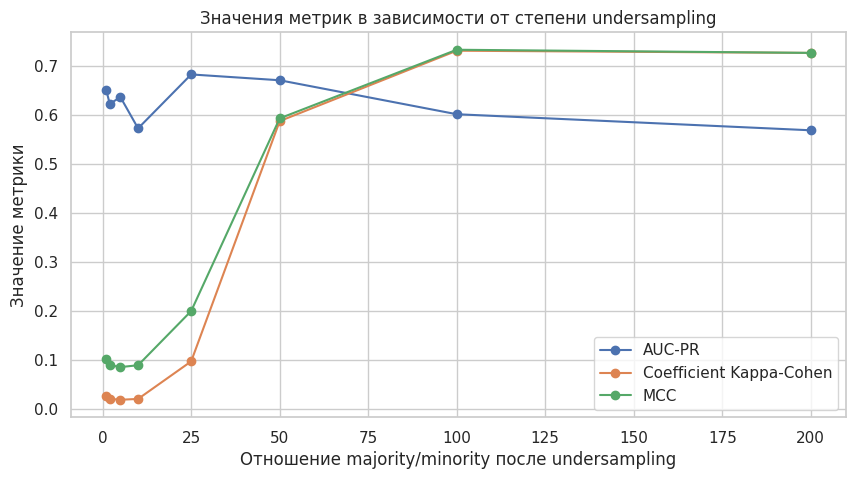

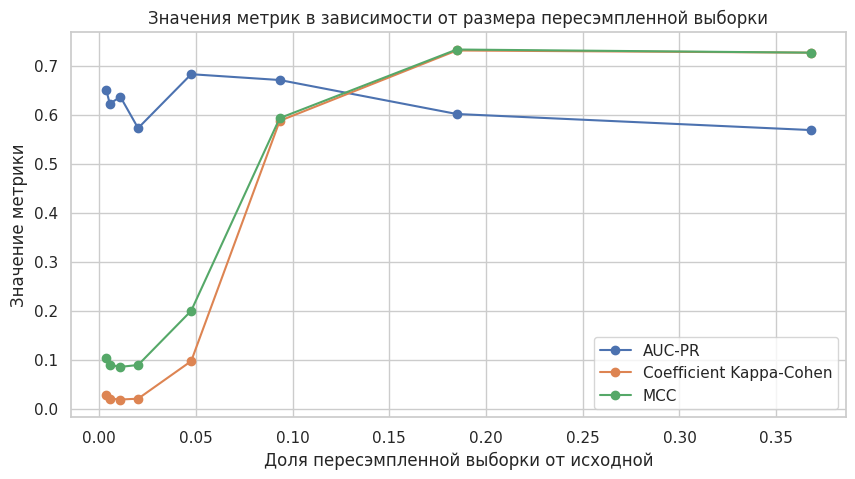

In [ ]:
results = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
for col in ["AUC-PR", "Coefficient Kappa-Cohen", "MCC"]:
    plt.plot(results["ratio"], results[col], marker='o', label=col)
plt.xlabel("Отношение majority/minority после undersampling")
plt.ylabel("Значение метрики")
plt.title("Значения метрик в зависимости от степени undersampling")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
for col in ["AUC-PR", "Coefficient Kappa-Cohen", "MCC"]:
    plt.plot(results["data_frac"], results[col], marker='o', label=col)
plt.xlabel("Доля пересэмпленной выборки от исходной")
plt.ylabel("Значение метрики")
plt.title("Значения метрик в зависимости от размера пересэмпленной выборки")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
ratio = 100 # на данный момент лучшее значение, но при инициализации может измениться
results = []
k_neighbours = [2, 3, 4, 5, 6, 7, 8]

for k in k_neighbours:
    sampler = NearMiss(sampling_strategy=lambda y: {0: sum(y == 1) * ratio, 1: sum(y == 1)}, n_neighbors=k)
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    model_undersample = CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        verbose=0
    )

    model_undersample.fit(X_resampled, y_resampled, eval_set=(X_val, y_val), early_stopping_rounds=50)

    y_test_proba_sampled = model_undersample.predict_proba(X_test)[:, 1]

    results.append({
        "k_neighbours": k,
        "AUC-PR": auc_pr(y_test, y_test_proba_sampled),
        "Coefficient Kappa-Cohen": coef_kappa_koena(y_test, y_test_proba_sampled),
        "MCC": matthews_corrcoef_implementation(y_test, y_test_proba_sampled)
    })

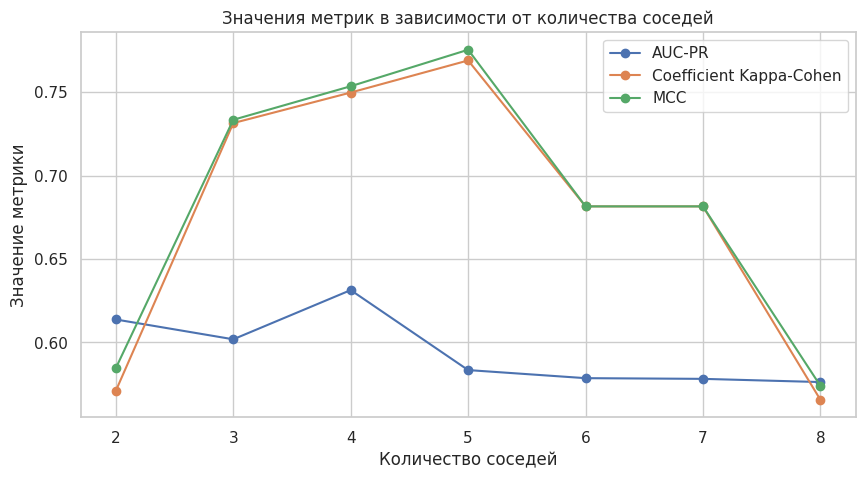

In [ ]:
results = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
for col in ["AUC-PR", "Coefficient Kappa-Cohen", "MCC"]:
    plt.plot(results["k_neighbours"], results[col], marker='o', label=col)
plt.xlabel("Количество соседей")
plt.ylabel("Значение метрики")
plt.title("Значения метрик в зависимости от количества соседей")
plt.grid(True)
plt.legend()
plt.show()

**Бонус (1 балл)**. imblearn также предлагает много различных методов для андерсэмплинга. Выберите что-нибудь еще из предлагаемого на свой вкус, опишите идею метода и протестируйте его.


EditedNearestNeighbours - данный метод ищет ближайщих соседей у объектов мажорного класса, и если большинство ближайщих соседей принадлежат минорному классу, то данный объект удаляется из итоговой обучающей выборки.

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:
ratio = 100

EditedNearestNeighbours_sampler = EditedNearestNeighbours(sampling_strategy= 'auto')
X_resampled, y_resampled = EditedNearestNeighbours_sampler.fit_resample(X_train, y_train)

In [ ]:
model_EditedNearestNeighbours = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0
)

model_EditedNearestNeighbours.fit(X_resampled, y_resampled, eval_set=(X_val, y_val), early_stopping_rounds=50)

y_test_proba_sampled = model_EditedNearestNeighbours.predict_proba(X_test)[:, 1]

In [ ]:
print(f'AUC-PR on test for samling with EditedNearestNeighbours: {auc_pr(y_test, y_test_proba_sampled )}')
print(f'Coefficient Kappa-Cohen implementation on test for samling with EditedNearestNeighbours:  {coef_kappa_koena(y_test, y_test_proba_sampled)}')
print(f'MCC implementation on test for samling with EditedNearestNeighbours: {matthews_corrcoef_implementation(y_test, y_test_proba_sampled)}')

AUC-PR on test for samling with EditedNearestNeighbours: 0.6738429281574082
Coefficient Kappa-Cohen implementation on test for samling with EditedNearestNeighbours:  0.717758652842163
MCC implementation on test for samling with EditedNearestNeighbours: 0.7237392722838328


Ну не знаю, метод получился прям не очень, при условии, что ждал я минут 20, пока он реализуется. При меньших значениях ratio модель показывала себя ещё хуже

# Часть 2. Поиск аномалий.

Как вы могли заметить, методы балансировки выборок очень часто могут привести к не самым лучшим результатам из-за того, что они по сути искажают информацию о реальном распределении данных - в реальности обычно требуется долгий подбор в принципе работоспособных для задачи методов и их аккуратная настройка.

Теперь давайте попробуем слегка сменить постановку задачи и переключиться на задачу "одноклассовой" классификации, то есть - поиска *аномалий* в выборке. В общем-то, это вполне согласуется с нашей областью работы - мы действительно можем назвать мошеннические транзакции аномальньми (как интуитивно, так и на основании наблюдаемой балансировки данных).

Стоит отметить, что методы обнаружения аномалий чаще всего относятся к классу методов обучения без учителя. Это дает некоторый положительный эффект - нам не обязательно нужно тратить время на разметку данных (тем не менее, для контроля качества какую-то часть разметить все-таки придется). Впрочем, чаще всего перфоманс таких методов оказывается заметно хуже, чем у честного обучения с учителем (если мы можем себе его позволить).



**Задание 4. (3 балла).** На занятиях вы разбирали схожий с Random Forest подход для детекции аномалий без известной разметки данных, называемый Isolation Forest. Напомним суть: на этапе обучения мы создаем ансамбль из решающих деревьев, в котором признак и порог на каждую вершину подбираются случайно. Затем мы считаем для объектов оценку аномальности через длину пути до соответствующего листа в каждом дереве.

В данном задании вам предлагается реализовать модификацию данного алгоритма, известную как Extended Isolation Forest. В ней мы на каждом шаге будем определять не порог для признака, а полноценную случайную гиперплоскость, разбивающую выборку на 2 части. С детальным описанием вы можете ознакомиться [здесь](https://arxiv.org/pdf/1811.02141.pdf).

Ниже приведен шаблон кода. Постарайтесь работать в его рамках (минорные изменения вполне допустимы, главное не переворачивайте всю структуру с ног на голову).

**NB**: будем считать, что в нашем датасете нет категориальных признаков - можете не заморачиваться с их обработкой (но в общем случае, это будет важно).

**Советы**:
 - Численные признаки лучше предобработать надлежащим образом.
 - Возможно, вам поможет выбрасывание некоторых признаков.
 - Внимательно следите за знаками.
 - Не игнорируйте документирующие строки.
 - Вероятнее всего, вы не сможете приблизиться по качеству к supervised-решениям. Если у вас не получается это сделать (но вы уверены в своей правоте), не стоит тратить слишком много времени на поиск ошибок.
- При желании, можете вынести этот код в отдельный файл и приложить его к ноутбуку. Он довольно громоздкий и в ноутбуке такое плохо читается.


**Бонусы (каждый по 0.5)**:
- Сделайте ваш EIF параллельным (`multiprocessing`, `joblib`).
- Добавьте возможность откатиться к дефолтному варианту Isolation Forest. (порассуждайте, как можно реализовать это в данной модели?):


In [ ]:
from math import log, ceil
from sklearn.utils import resample

In [ ]:
def c_factor(n):
    """
    Computes average path length for an unsuccessful search in a binary search tree.
    Params:
        n: int - number of data points for BST
    """
    if n <= 1:
        return 0
    H = log(n - 1) + 0.5772
    return 2 * H - 2 * (n - 1) / n

def calc_height(X, depth, node):
    """
    Calculates anomaly scores for sample in a recursive manner.
    Params:
        X: np.array - current sample, available to node

        depth: int - path length up to current node

        node: Node - current tree node

    Returns:
        scores: int, float or np.array - anomaly scores for sample
    """
    scores = np.zeros(X.shape[0])

    if node.kind == "external":
        return np.full(X.shape[0], depth + c_factor(node.size))

    projection = np.dot(X, node.w)

    left_mask = projection < node.b
    right_mask = ~left_mask

    scores[left_mask] = calc_height(X[left_mask], depth + 1, node.left)
    scores[right_mask] = calc_height(X[right_mask], depth + 1, node.right)

    return scores


class Node(object):
    """
    A single node object for each tree. Contains information on height, current data,
    splitting hyperplane and children nodes.

    Attributes:
        X: np.array - data available to current node
        size: int - length of available data

        depth: int - depth of node

        left: Node - left child
        right: Node - right child

        kind: str - either "internal" or "external", indicates the type of current node

        w: np.array - normal vector for the splitting hyperplane
        b: float - intercept term for the splitting hyperplane
    """
    def __init__(self, X, depth, left, right, kind, w, b):
        """
        Node(h, left, right, kind, w, b)
        Represents the node object.

        Params:
            X: np.array - data available to current node
            depth: int - depth of node

            left: Node - left child
            right: Node - right child

            kind: str - either "internal" or "external", indicates the type of current node

            w: np.array - normal vector for the splitting hyperplane
            b: float - intercept term for the splitting hyperplane

        """
        self.size = len(X)

        self.depth = depth

        self.left = left
        self.right = right

        self.kind = kind

        self.w = w
        self.b = b

    def __repr__(self):
        """
        For convenience only.
        """
        return f"Node(size={self.size}, depth={self.depth}, kind={self.kind})"

class RandomizedTree(object):
    """
    Single randomized tree object. Stores root and its depth (tree is built recursively).
    Attributes:
        depth: int - current tree depth

        max_depth: int - maximum tree depth

        root: Node - root node

        internal_count: int - number of internal nodes

        external_count: int - number of external nodes

    """
    def __init__(self, X, max_depth):
        """
        Single randomized tree object. Stores root and its depth (tree is built recursively).
        Params:
            X: np.array - train sample
            max_depth: int - maximum tree depth

        """
        self.depth = 0
        self.max_depth = max_depth

        self.internal_count = 0
        self.external_count = 0

        self.root = self.grow(X, 0)

    def __repr__(self):
        """
        For convenience only.
        """

        return f"RandomizedTree(depth={self.depth}, max_depth={self.max_depth}, n_internal={self.internal_count}, n_external={self.external_count})"



    def grow(self, X, depth):
        """
        Grow tree in a recursive manner.
        Params:
            X: np.array - available train sample

            depth: int - current tree depth

        Returns:
            node: Node - a trained node with separating hyperplane data.
                         Node provides access to children if necessary (these are built recursively)
        """
        if depth >= self.max_depth or X.shape[0] <= 1:
            return Node(X, depth, None, None, "external", None, None)

        n_features = X.shape[1]

        w = np.random.normal(size=n_features)
        w = w / np.linalg.norm(w)

        projection = np.dot(X, w)
        min_projection, max_projection = np.min(projection), np.max(projection)

        if min_projection == max_projection:
            return Node(X, depth, None, None, "external", None, None)

        t = np.random.uniform(min_projection, max_projection)

        left_mask = projection < t
        right_mask = ~left_mask

        left = self.grow(X[left_mask], depth + 1)
        right = self.grow(X[right_mask], depth + 1)

        return Node(X, depth, left, right, "internal", w, t)

    def score_samples(self, X):
        """
        Calculate anomaly scores for given data. You may utilize outer function `calc_height`.
        Params:
            X: np.array - data to be evaluated

        Returns:
            scores: np.array - estimated anomaly scores
        """
        scores = calc_height(X, 0, self.root)

        return scores


class ExtendedIsolationForest(object):
    """
    Extended Isolation Forest object. Stores training data and trained randomized trees.
    Attributes:
        n_trees: int - number of Randomized Trees

        max_depth: int - maximum depth of each tree

        subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree

        trees: list - container for trained trees

        contamination: float - estimated fraction of anomaly samples in data. Used for thresholding

    """

    def __init__(self, n_trees, subsample_rate, max_depth=None, contamination=0.01):
        """
        Extended Isolation Forest object. Stores training data and trained randomized trees.
        Params:
            n_trees: int - number of Randomized Trees

            subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree

            max_depth: int or None - maximum depth of each tree. Defaults to ceil(log_2(subsample_size)) if not provided

            contamination: float - estimated fraction of anomaly samples in data. Used for thresholding

        """
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_rate = subsample_rate
        self.trees = []
        self.contamination = contamination
        self.is_fit = False

    def __repr__(self):
        """For convenience only."""

        return f"ExtendedIsolationForest(n_trees={self.n_trees}, max_depth={self.max_depth}, subsample_rate={self.subsample_rate}, contamination={self.contamination}, is_fit={self.is_fit})"

    def fit(self, X):
        """
        Fit EIF to new data.
        Params:
            X: np.array - 2d array of samples
        """
        n_samples = int(self.subsample_rate * X.shape[0])
        if self.max_depth is None:
            self.max_depth = ceil(log(n_samples, 2))

        self.trees = []
        for _ in range(self.n_trees):
            X_sample = resample(X, n_samples=n_samples, replace=False)
            tree = RandomizedTree(X_sample, self.max_depth)
            self.trees.append(tree)

        self.is_fit = True

        return self

    def score_samples(self, X):
        """
        Estimate (normalized) anomaly score for each given sample
        Params:
            X: np.array - new samples

        Returns:
            scores: np.array - anomaly scores (larger value means higher probability of a sample being an outlier)
        """
        all_scores = np.array([tree.score_samples(X) for tree in self.trees])

        avg_path_lengths = np.mean(all_scores, axis=0)

        l = int(self.subsample_rate * X.shape[0])

        scores = 2 ** (-avg_path_lengths / c_factor(l))

        return scores

    def predict(self, X):
        """
        Predict if given samples are outliers.
        Params:
            X: np.array - new samples

        Returns:
            labels: np.array - anomaly labels (1 for outliers, 0 for inliers)
        """
        scores = self.score_samples(X)
        threshold = np.percentile(scores, 100 * (1 - self.contamination))
        labels = (scores > threshold).astype(int)

        return labels


**Задание 5. (1 балл).** Протестируйте вашу реализацию EIF и подберите оптимальные гиперпараметры (наш метод не использует разметку, поэтому можете попробовать делать это на обучающей выборке). Сравните ее с обычным IF из `sklearn` (желательно делать это на одних и тех же параметрах). Удалось ли сделать лучше?

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def objective(trial):
    params = {
        "n_trees": trial.suggest_int("n_trees", 1, 100),
        "subsample_rate": trial.suggest_float("subsample_rate", 0.001, 0.9),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "contamination": trial.suggest_float("contamination", 0.001, 0.5)
    }

    model = ExtendedIsolationForest(**params)
    model.fit(
        X_train_scaled
    )

    preds = model.predict(X_val_scaled)
    acc = matthews_corrcoef_implementation(y_val, preds)
    return acc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Лучшие параметры:")
print(study.best_trial.params)
print("matthews_corrcoef_implementation", study.best_value)

[I 2025-05-10 13:45:50,070] A new study created in memory with name: no-name-389b3f2b-fedd-4d42-8b96-05edcec445ab
[I 2025-05-10 13:46:04,720] Trial 0 finished with value: 0.045270852900878546 and parameters: {'n_trees': 93, 'subsample_rate': 0.41612804714519275, 'max_depth': 8, 'contamination': 0.4587016672523252}. Best is trial 0 with value: 0.045270852900878546.
[I 2025-05-10 13:46:06,112] Trial 1 finished with value: 0.06822597130437129 and parameters: {'n_trees': 28, 'subsample_rate': 0.04139091774500441, 'max_depth': 7, 'contamination': 0.2548256478527336}. Best is trial 1 with value: 0.06822597130437129.
[I 2025-05-10 13:46:08,416] Trial 2 finished with value: 0.04240639255445617 and parameters: {'n_trees': 14, 'subsample_rate': 0.5414278840573902, 'max_depth': 4, 'contamination': 0.28657951643383944}. Best is trial 1 with value: 0.06822597130437129.
[I 2025-05-10 13:46:14,653] Trial 3 finished with value: 0.11063536913653113 and parameters: {'n_trees': 47, 'subsample_rate': 0.38

Лучшие параметры:
{'n_trees': 47, 'subsample_rate': 0.2217195155040787, 'max_depth': 7, 'contamination': 0.012887776083152294}
matthews_corrcoef_implementation 0.23344337323091774


In [ ]:
model_EIF_implementation = ExtendedIsolationForest(
    n_trees=study.best_trial.params['n_trees'],
    subsample_rate=study.best_trial.params['subsample_rate'],
    max_depth=study.best_trial.params['max_depth'],
    contamination=study.best_trial.params['contamination']
)

model_EIF_implementation.fit(
    X_train_scaled
)

y_test_pred_EIF = model_EIF_implementation.predict(X_test_scaled)

In [ ]:
model_IF = IsolationForest(
    n_estimators=study.best_trial.params['n_trees'],
    max_samples=study.best_trial.params['subsample_rate'],
    contamination=study.best_trial.params['contamination']
)

model_IF.fit(
    X_train_scaled
)

y_test_pred_IF = model_IF.predict(X_test_scaled)

In [ ]:
print(f'AUC-PR on test with EIF: {auc_pr(y_test, y_test_pred_EIF)}')
print(f'Coefficient Kappa-Cohen implementation on test with EIF: {coef_kappa_koena(y_test, y_test_pred_EIF)}')
print(f'MCC implementation on test with EIF: {matthews_corrcoef_implementation(y_test, y_test_pred_EIF)}')

AUC-PR on test with EIF: 0.26513876337085135
Coefficient Kappa-Cohen implementation on test with EIF: 0.05503273798308293
MCC implementation on test with EIF: 0.11991644647414755


In [ ]:
print(f'AUC-PR on test with IF: {auc_pr(y_test, y_test_pred_IF)}')
print(f'Coefficient Kappa-Cohen implementation on test with IF: {cohen_kappa_score(y_test, y_test_pred_IF)}')
print(f'MCC implementation on test with IF: {matthews_corrcoef(y_test, y_test_pred_IF)}')

AUC-PR on test with IF: 0.15947894414814878
Coefficient Kappa-Cohen implementation on test with IF: -0.0005158312976236701
MCC implementation on test with IF: -0.07750649842248825


Получили результаты сильно хуже, чем из первой части ДЗ. При это EIF обошёл реализацию из sklearn по всем метрикам.

Возможно, ваш алгоритм выдал большие оценки объектам с негативной разметкой. Постарайтесь выбрать несколько таких объектов и доступно объяснить (= с кодом и графиками), почему так вышло:

In [ ]:
scores_EIF = model_EIF_implementation.score_samples(X_test_scaled)

In [ ]:
mistakes_mask = (y_test == 0) & (y_test_pred_EIF == 1)
mistake_idx = np.where(mistakes_mask)[0]

print("Индексы нормальных объектов, но высокооценённых как аномалии:", mistake_idx)
print("Оценки:", scores_EIF[mistake_idx])

Индексы нормальных объектов, но высокооценённых как аномалии: [  227   300   307   318   532   701   861   962  1032  1212  1375  1578
  1584  1598  1637  1644  1713  1815  1895  2024  2036  2091  2173  2243
  2273  2289  2471  2542  2686  2712  2836  2840  2949  3063  3204  3294
  3328  3394  3599  3820  4175  4188  4259  4263  4497  4547  4569  4573
  4688  4699  4956  5020  5236  5292  5295  5322  5340  5424  5434  5517
  5754  5818  5852  5940  6051  6052  6200  6202  6241  6284  6290  6364
  6513  6517  6521  6724  6852  7029  7177  7258  7260  7307  7332  7412
  7476  7819  7828  8005  8030  8160  8183  8226  8237  8311  8377  8401
  8490  8502  8599  8831  8887  9074  9104  9331  9439  9635  9779  9876
 10005 10100 10108 10228 10264 10672 10698 10716 10778 10924 11088 11089
 11121 11167 11208 11434 11573 11618 11740 11945 12038 12064 12325 12554
 13030 13202 13206 13314 13392 13646 13855 13878 13959 13987 14042 14276
 14367 14411 14541 14636 14649 14747 14799 14800 15034 15151 1

In [ ]:
frod_mask = (y_test == 1) & (y_test_pred_EIF == 1)
frod_idx = np.where(frod_mask)[0]

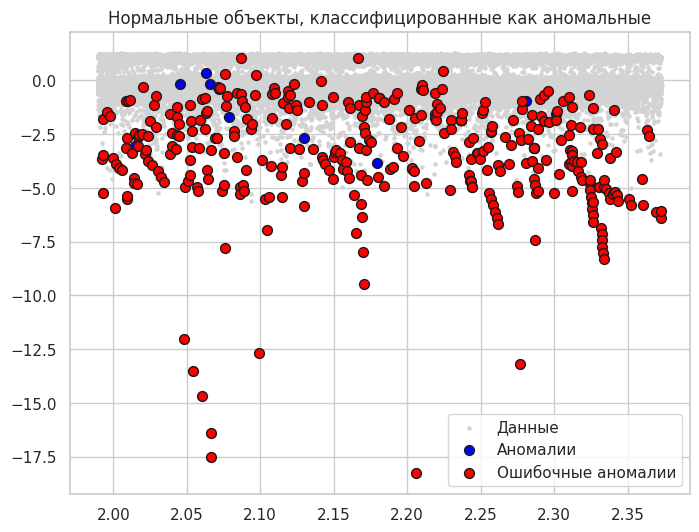

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Нормальные объекты, классифицированные как аномальные")
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='lightgrey', s=5, label="Данные")
plt.scatter(X_test_scaled[frod_idx, 0], X_test_scaled[frod_idx, 1], c='blue', s=50, edgecolors='k', label="Аномалии")
plt.scatter(X_test_scaled[mistake_idx, 0], X_test_scaled[mistake_idx, 1], c='red', s=50, edgecolors='k', label="Ошибочные аномалии")
plt.legend()
plt.grid(True)
plt.show()

Подозреваю, что такое могло произойти из-за того, что EIF в целом очень чувствителен к объектам, которые можно определить как уникальные в некоторых плоскостях. Если в графике поменять признаки, по которым он строится, можно очень легко заметить выделяющиеся красные точки. Их модель определяет как аномалии, так как они не похожи на остальные объекты мажорного класса и попадают в узкую ветвь дерева, из-за чего нормальный объект находится очень далеко от корня дерева.

**Задание 6. (1 балл).** `sklearn` также предлагает нам и другие методы для поиска аномалий. В этом задании мы предлагаем вам сделать следующее:

Для начала попробуйте использовать методы Local Outlier Factor и One-Class SVM. Сравните результаты с IF и EIF.  

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [ ]:
lof = LocalOutlierFactor(n_neighbors=10)
lof_scores = lof.fit_predict(X_train_scaled)

In [ ]:
print(f'AUC-PR on test with LOF: {auc_pr(y_train, lof_scores)}')
print(f'Coefficient Kappa-Cohen implementation on test with LOF: {cohen_kappa_score(y_train, lof_scores)}')
print(f'MCC implementation on test with LOF: {matthews_corrcoef(y_train, lof_scores)}')

AUC-PR on test with LOF: 0.43621492621183966
Coefficient Kappa-Cohen implementation on test with LOF: -0.00013315444946093713
MCC implementation on test with LOF: -0.006714382818386938


In [ ]:
OCSVM = OneClassSVM(max_iter=1000)
OCSVM.fit(X_train)
y_test_pred_OCSVM = OCSVM.predict(X_test)

In [ ]:
print(f'AUC-PR on test with OCSVM: {auc_pr(y_test, y_test_pred_OCSVM)}')
print(f'Coefficient Kappa-Cohen implementation on test with OCSVM: {cohen_kappa_score(y_test, y_test_pred_OCSVM)}')
print(f'MCC implementation on test with OCSVM: {matthews_corrcoef(y_test, y_test_pred_OCSVM)}')

AUC-PR on test with OCSVM: 0.5003862223938766
Coefficient Kappa-Cohen implementation on test with OCSVM: 0.0
MCC implementation on test with OCSVM: 0.0


Думаю, можно сказать, что EIF в данной ситуации является лучшей моделью. Она доминирует во всех метриках качества, кроме AUC-PR, но при этом у остальных моделей значения Coefficient Kappa-Cohen и MCC примерно такие же, как и у наивного прогноза.

У вас началась депрессия из-за плохих метрик? Не беда! Сейчас давайте сделаем так: все методы, опробованные в этой части, попробуем задействовать для создания дополнительных признаков в данных. Проделайте это (не забудьте, что обучаться здесь нужно на трейне). Теперь возьмите лучшую модель из предыдущей части и обучите на новых данных. Смогли ли unsupervised-методы повысить вам качество?

In [ ]:
X_train_EIF = model_EIF_implementation.predict(X_train_scaled)
X_test_EIF = model_EIF_implementation.predict(X_test_scaled)

X_train_IF = model_IF.predict(X_train_scaled)
X_test_IF = model_IF.predict(X_test_scaled)

X_train_OCSVM = OCSVM.predict(X_train_scaled)
X_test_OCSVM = OCSVM.predict(X_test_scaled)

In [ ]:
lof_scores = lof.fit_predict(pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_test_scaled)], axis = 0))
X_train_LOF = lof_scores[:len(X_train_scaled)]
X_test_LOF = lof_scores[len(X_train_scaled):]

In [ ]:
X_train_last = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_train_EIF, columns = ['1']), pd.DataFrame(X_train_IF, columns = ['2']), pd.DataFrame(X_train_OCSVM, columns = ['3']), pd.DataFrame(X_train_LOF, columns = ['4'])], axis = 1)
X_test_last = pd.concat([pd.DataFrame(X_test.values, columns=X_test.columns), pd.DataFrame(X_test_EIF, columns = ['1']), pd.DataFrame(X_test_IF, columns = ['2']), pd.DataFrame(X_test_OCSVM, columns = ['3']), pd.DataFrame(X_test_LOF, columns = ['4'])], axis = 1)

In [ ]:
n_majority_target = n_neg//10

adasyn = ADASYN(sampling_strategy = n_majority_target / n_neg, n_neighbors=5, random_state = 52)
X_train_sampled, y_train_sampled = adasyn.fit_resample(X_train_last, y_train)

model_oversample = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0
)
model_oversample.fit(X_train_sampled, y_train_sampled)

y_test_pred_sampled = model_oversample.predict(X_test_last)
y_test_proba_sampled = model_oversample.predict_proba(X_test_last)[:, 1]

print(f'AUC-PR on test for samling with ADASYN: {auc_pr(y_test, y_test_proba_sampled)}')
print(f'Coefficient Kappa-Cohen implementation on test for samling with ADASYN:  {coef_kappa_koena(y_test, y_test_proba_sampled)}')
print(f'MCC implementation on test for samling with ADASYN: {matthews_corrcoef_implementation(y_test, y_test_proba_sampled)}')

AUC-PR on test for samling with ADASYN: 0.7334569702906175
Coefficient Kappa-Cohen implementation on test for samling with ADASYN:  0.743992894025702
MCC implementation on test for samling with ADASYN: 0.7441944677557768


В итоге качество упало. Возможно это связано с тем, что мы по сути к данным прицепили ответы моделей, которые показали себя не очень хорошо, и из-за этого основная модель оказалась хуже. А возможно это связано с инициализацией, потому что сиды я не фиксировал.

**Бонус. (0.1 балла).**

При сдаче проверяющий запустит следующую клетку один раз. Если она даст положительный результат, вы получите 0.1 бонусных балла. Если она даст отрицательный результат, вы получите -0.1 бонусных балла.

Если вы хотите отказаться от сдачи данного задания, допишите "хочу" после двоеточия: хочу

Ниже вы можете попрактиковаться и оценить ваши силы (изменять код ячейки запрещается!)

In [ ]:
import random

rng = random.SystemRandom(0)
rng.uniform(-1.0, 1.0)